In [318]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [319]:
df=pd.read_excel("/content/dataset.xlsx")
df.head()

,Unnamed: 0,Price,Location,Bedroom,Bathroom,Carport,Land,Building,Month,City/Regency,Latitude,Longitude
0,0,1.600000e+09,Padalarang,2,1.0,1.0,72.0,50.0,8.0,West Bandung Regency,-6.843600,107.478400
1,1,8.500000e+08,Parongpong,2,1.0,1.0,70.0,80.0,8.0,West Bandung Regency,-6.803228,107.581804
2,2,8.750000e+08,Buah Batu,3,2.0,1.0,60.0,70.0,8.0,Bandung City,-6.965549,107.637926
3,3,1.750000e+09,Bojongsoang,2,3.0,1.0,90.0,94.0,8.0,Bandung Regency,-6.993945,107.643700
4,4,4.900000e+09,Bojongloa Kidul,4,4.0,0.0,200.0,300.0,8.0,Bandung City,-6.947036,107.596271


In [320]:
df.shape

(32536, 12)

In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32536 entries, 0 to 32535
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    32536 non-null  int64  
 1   Price         32536 non-null  float64
 2   Location      32527 non-null  object 
 3   Bedroom       32536 non-null  int64  
 4   Bathroom      32521 non-null  float64
 5   Carport       32521 non-null  float64
 6   Land          32533 non-null  float64
 7   Building      32527 non-null  float64
 8   Month         32527 non-null  float64
 9   City/Regency  32527 non-null  object 
 10  Latitude      32526 non-null  float64
 11  Longitude     32527 non-null  float64
dtypes: float64(8), int64(2), object(2)
memory usage: 3.0+ MB


In [322]:
df.describe()

,Unnamed: 0,Price,Bedroom,Bathroom,Carport,Land,Building,Month,Latitude,Longitude
count,32536.000000,3.253600e+04,32536.000000,32521.000000,32521.000000,32533.000000,32527.000000,32527.000000,32526.000000,32527.000000
mean,25966.194308,2.554932e+09,3.524158,2.527721,1.052120,181.392002,179.397485,8.988533,-6.923486,107.625922
std,15468.621566,1.879994e+09,1.235943,1.074318,0.796993,107.491313,108.516303,0.821016,0.051064,0.075701
min,0.000000,1.020000e+07,1.000000,1.000000,0.000000,37.000000,37.000000,8.000000,-7.230321,107.434849
25%,12565.750000,1.200000e+09,3.000000,2.000000,0.000000,105.000000,100.000000,8.000000,-6.952981,107.590747
50%,25392.000000,2.000000e+09,3.000000,2.000000,1.000000,147.000000,150.000000,9.000000,-6.931934,107.626219
75%,39255.250000,3.365000e+09,4.000000,3.000000,2.000000,225.000000,235.000000,10.000000,-6.886334,107.659881
max,53466.000000,9.700000e+09,8.000000,7.000000,3.000000,612.000000,585.000000,10.000000,-6.734761,107.886580


In [323]:
df.isna().sum()

,0
Unnamed: 0,0
Price,0
Location,9
Bedroom,0
Bathroom,15
Carport,15
Land,3
Building,9
Month,9
City/Regency,9


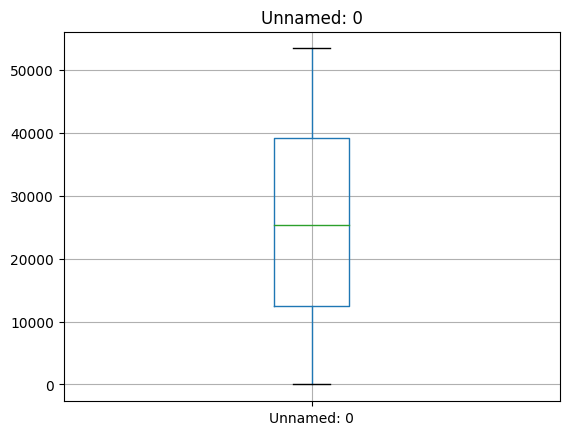

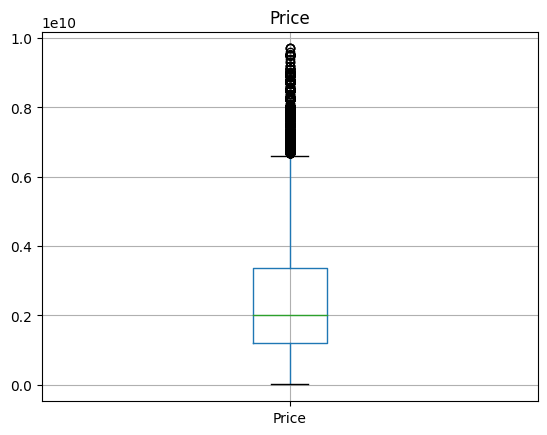

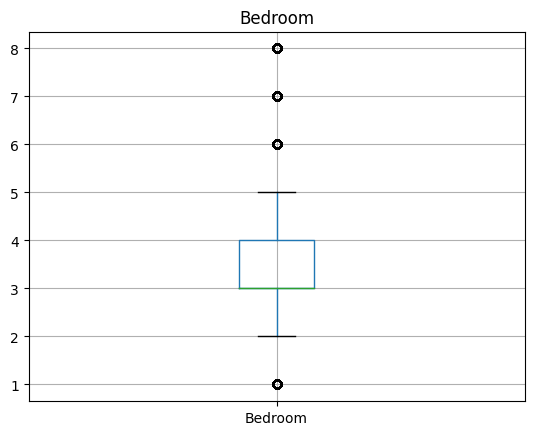

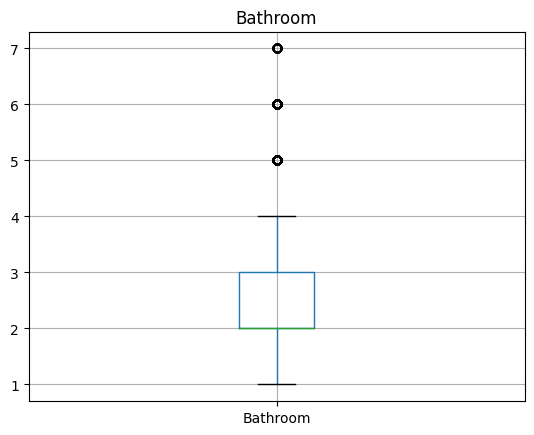

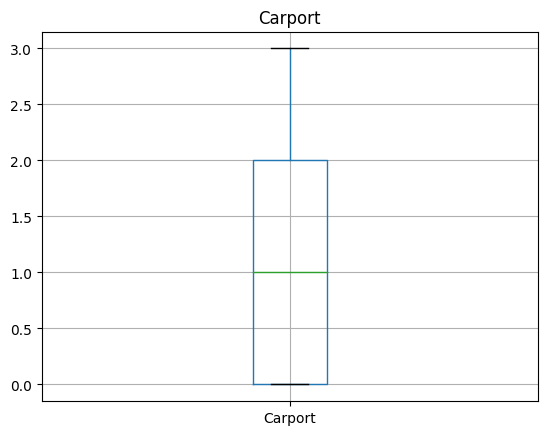

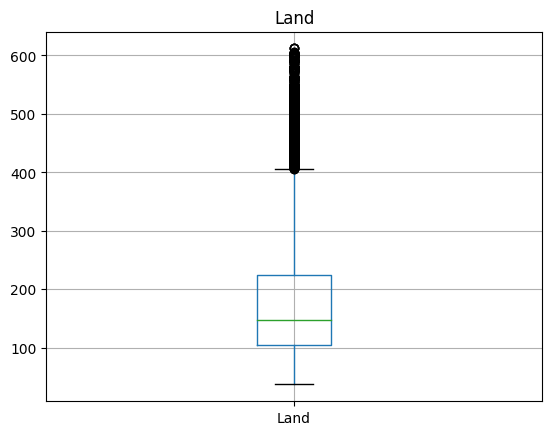

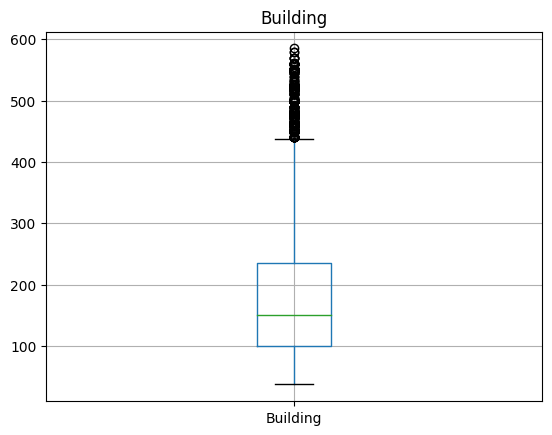

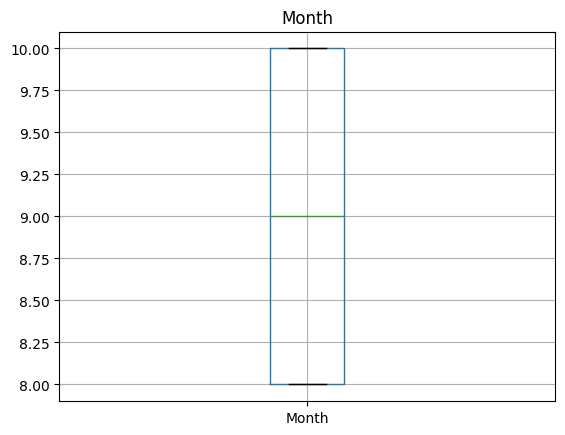

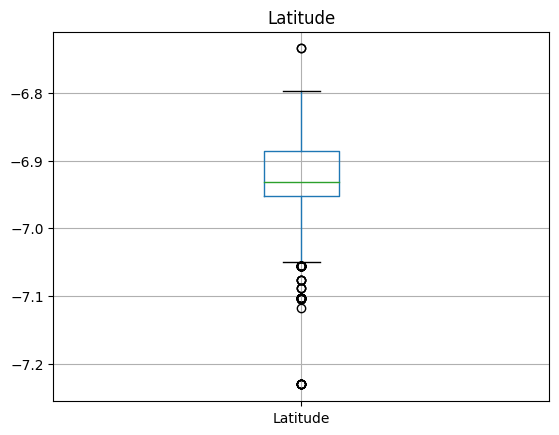

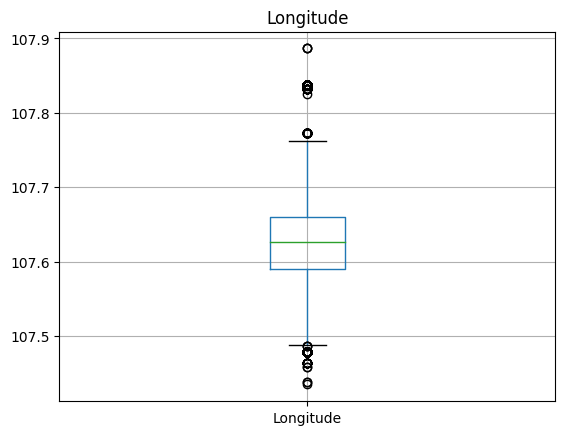

In [324]:
for col in df.columns:
  if df[col].dtype != 'object':
    plt.figure()
    df.boxplot([col])
    plt.title(col)

# **Step 1:EDA**

```
here the target variable is price
```



# **Univariate analysis**
1.Unnamed: 0

In [325]:
unnamed = df['Unnamed: 0'].value_counts()
unnamed_proportions =df['Unnamed: 0'].value_counts(normalize=True)
unnamed_analysis = pd.DataFrame({
    'Count': unnamed,
    'Proportion': unnamed_proportions
})

unnamed_analysis

,Count,Proportion
Unnamed: 0,,
0,1,0.000031
35419,1,0.000031
35446,1,0.000031
35444,1,0.000031
35441,1,0.000031
...,...,...
17160,1,0.000031
17159,1,0.000031
17158,1,0.000031


so here we can conclude that it is uniques for every single rows in the dataset
so i decided to remove the columns

In [326]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [327]:
df.head()

,Price,Location,Bedroom,Bathroom,Carport,Land,Building,Month,City/Regency,Latitude,Longitude
0,1.600000e+09,Padalarang,2,1.0,1.0,72.0,50.0,8.0,West Bandung Regency,-6.843600,107.478400
1,8.500000e+08,Parongpong,2,1.0,1.0,70.0,80.0,8.0,West Bandung Regency,-6.803228,107.581804
2,8.750000e+08,Buah Batu,3,2.0,1.0,60.0,70.0,8.0,Bandung City,-6.965549,107.637926
3,1.750000e+09,Bojongsoang,2,3.0,1.0,90.0,94.0,8.0,Bandung Regency,-6.993945,107.643700
4,4.900000e+09,Bojongloa Kidul,4,4.0,0.0,200.0,300.0,8.0,Bandung City,-6.947036,107.596271


2.Location

In [328]:
df['Location'].value_counts()

,count
Location,
Buah Batu,2781
Padalarang,2560
Sukasari,2002
Margaasih,1817
Antapani,1707
...,...
Cikalong Wetan,2
Cililin,2
Rancabali,1


In [329]:
df.isnull().sum()

,0
Price,0
Location,9
Bedroom,0
Bathroom,15
Carport,15
Land,3
Building,9
Month,9
City/Regency,9
Latitude,10


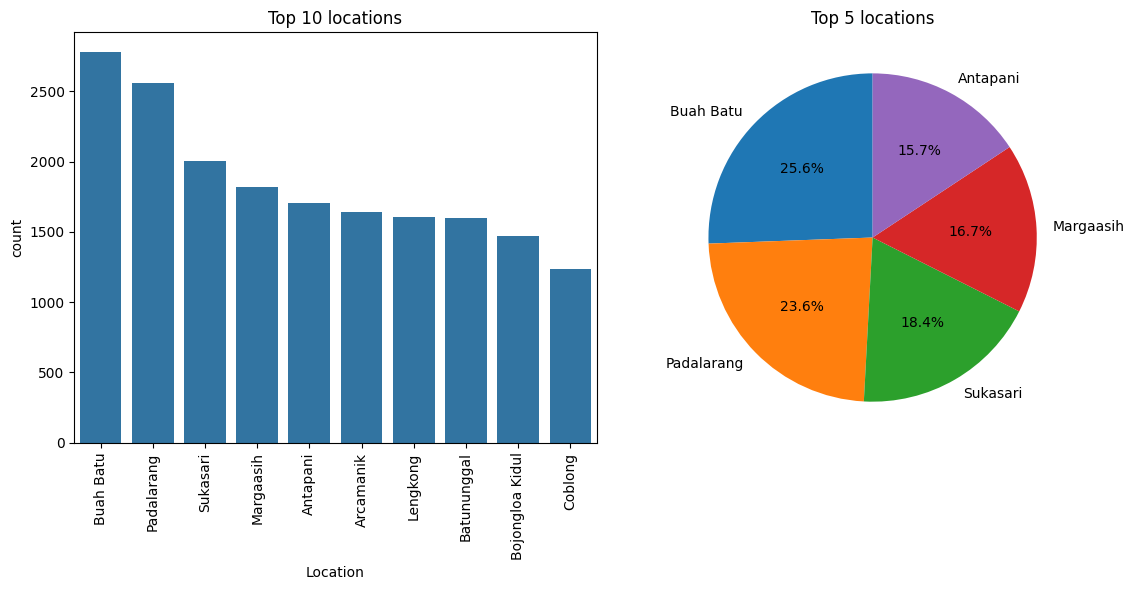

In [330]:
# Count plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Location', data=df, order=df['Location'].value_counts().index[:10])
plt.xticks(rotation=90)
plt.title('Top 10 locations')

# Pie chart
plt.subplot(1, 2, 2)
location_counts = df['Location'].value_counts()
top_locations = location_counts[:5]  # Consider only the top 5 cities
plt.pie(top_locations, labels=top_locations.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 locations')

plt.tight_layout()
plt.show()


3.Bedroom

In [331]:
print("\nFrequency Distribution for 'Bedroom':")
print(df["Bedroom"].value_counts())


Frequency Distribution for 'Bedroom':
Bedroom
3    11470
4     8698
2     6197
5     3680
6     1383
7      606
1      270
8      232
Name: count, dtype: int64


<ipython-input-332-a6cbe9c42da9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Bedroom', data=df, palette='viridis')


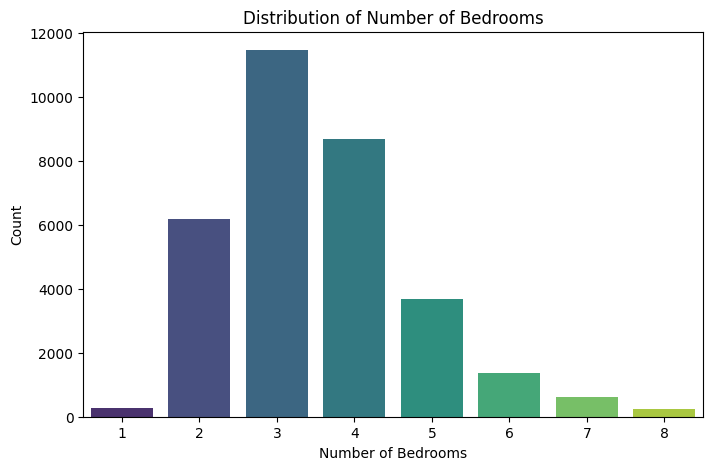

In [332]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Bedroom', data=df, palette='viridis')
plt.title('Distribution of Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.show()

4.bathroom

In [333]:
df

,Price,Location,Bedroom,Bathroom,Carport,Land,Building,Month,City/Regency,Latitude,Longitude
0,1.600000e+09,Padalarang,2,1.0,1.0,72.0,50.0,8.0,West Bandung Regency,-6.843600,107.478400
1,8.500000e+08,Parongpong,2,1.0,1.0,70.0,80.0,8.0,West Bandung Regency,-6.803228,107.581804
2,8.750000e+08,Buah Batu,3,2.0,1.0,60.0,70.0,8.0,Bandung City,-6.965549,107.637926
3,1.750000e+09,Bojongsoang,2,3.0,1.0,90.0,94.0,8.0,Bandung Regency,-6.993945,107.643700
4,4.900000e+09,Bojongloa Kidul,4,4.0,0.0,200.0,300.0,8.0,Bandung City,-6.947036,107.596271
...,...,...,...,...,...,...,...,...,...,...,...
32531,4.750000e+08,Rancasari,2,1.0,1.0,60.0,65.0,10.0,Bandung City,-6.953536,107.675210
32532,7.000000e+09,Bojongloa Kidul,5,5.0,2.0,426.0,500.0,10.0,Bandung City,-6.947036,107.596271
32533,5.500000e+09,Sukasari,5,3.0,2.0,427.0,283.0,10.0,Bandung City,-6.863000,107.588100
32534,3.950000e+09,Regol,4,3.0,2.0,182.0,380.0,10.0,Bandung City,-6.939713,107.613797


# **Bivariate analysis**

**in numerical**

In [334]:
numerical_columns=df.select_dtypes(include=[np.number]).columns
numerical_columns

Index(['Price', 'Bedroom', 'Bathroom', 'Carport', 'Land', 'Building', 'Month',
       'Latitude', 'Longitude'],
      dtype='object')

In [335]:
correlation_matrix = df[numerical_columns].corr()['Price']
print(correlation_matrix)

Price        1.000000
Bedroom      0.436896
Bathroom     0.523423
Carport      0.255847
Land         0.773653
Building     0.744226
Month        0.022700
Latitude     0.274701
Longitude   -0.263013
Name: Price, dtype: float64


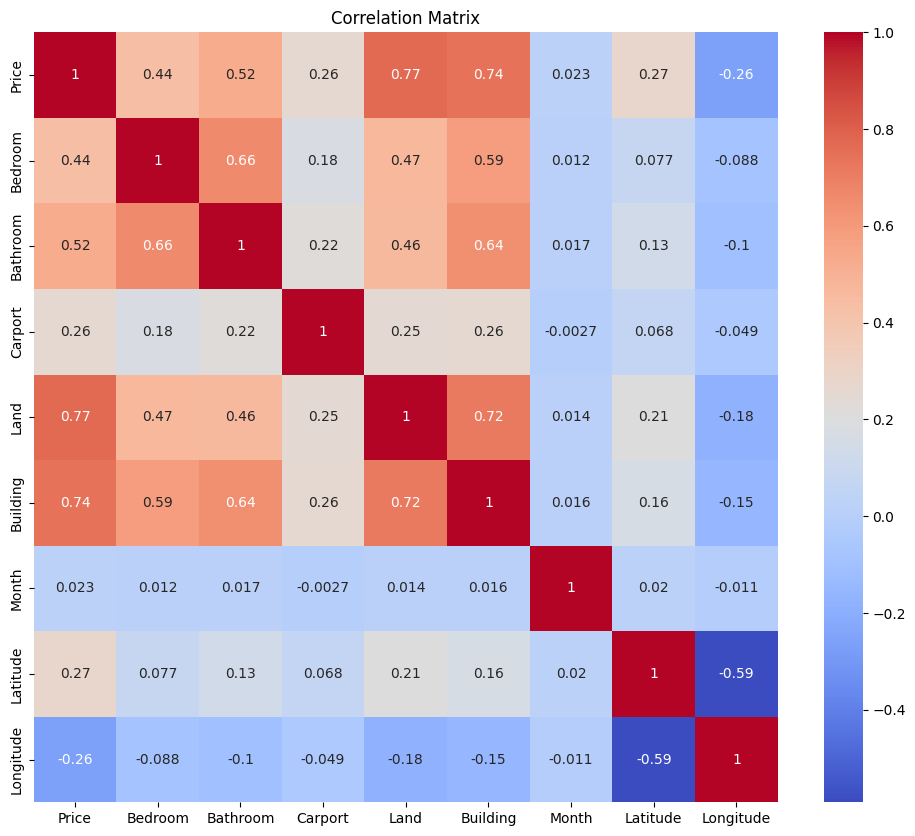

In [336]:
correlation_matrix = df.select_dtypes(include=np.number).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Building and Land sizes are likely to have the highest correlation with property prices.
Bedroom and Bathroom count also show some influence but are less impactful.

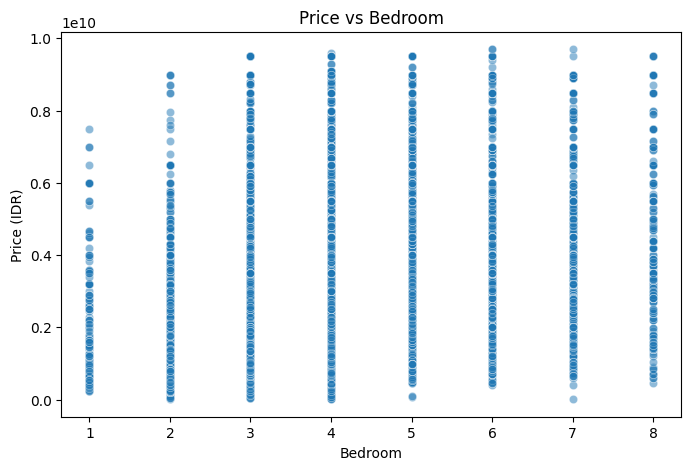

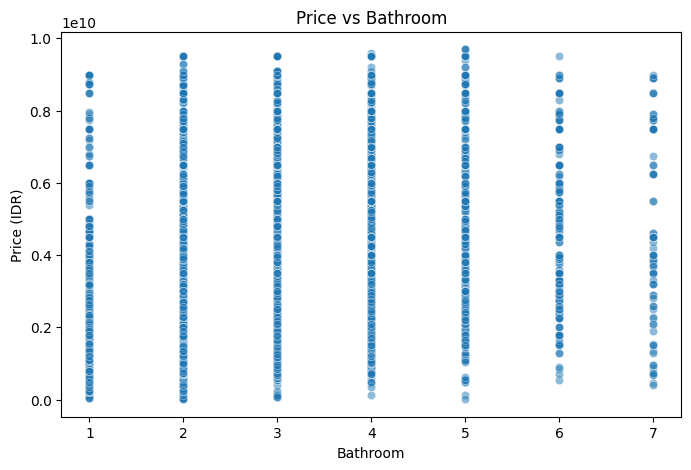

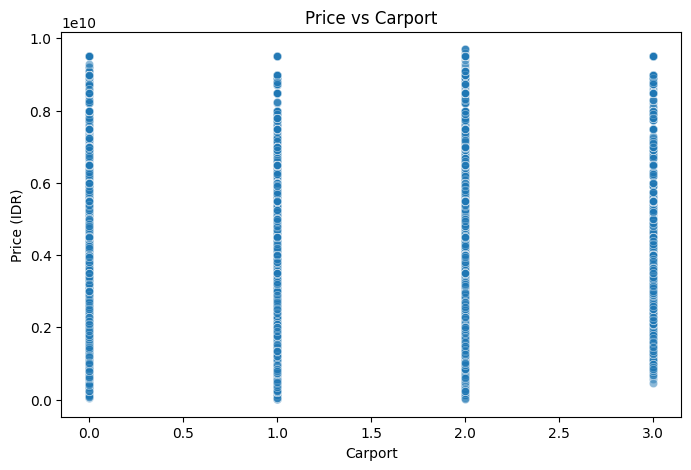

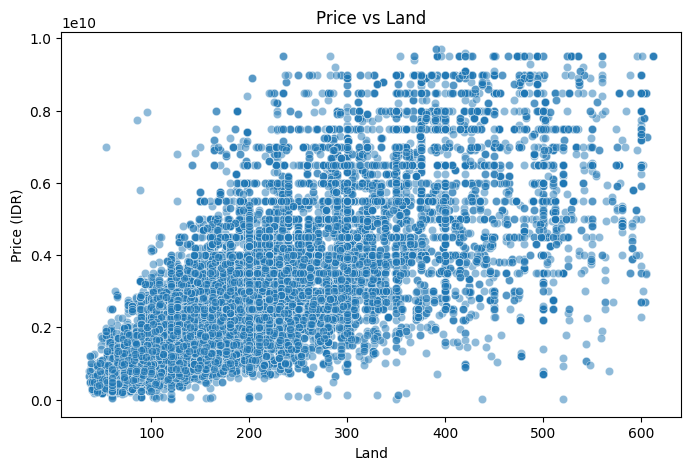

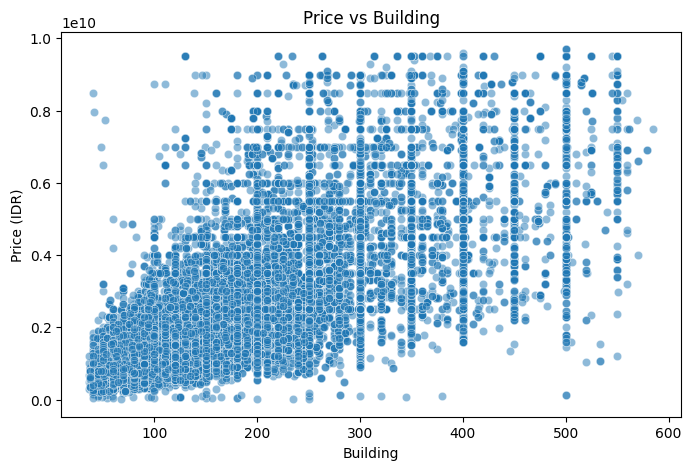

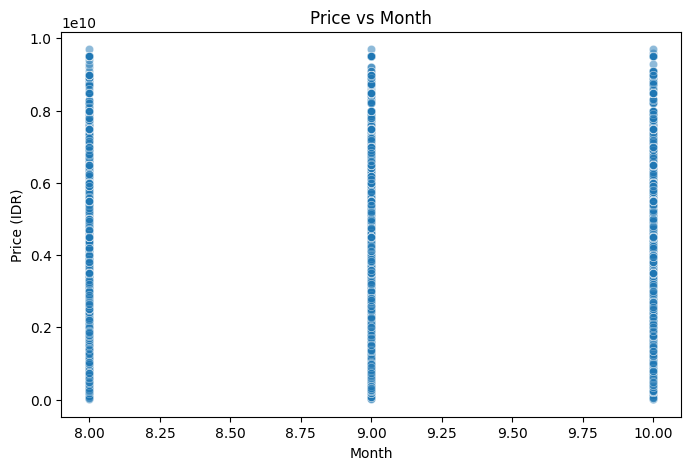

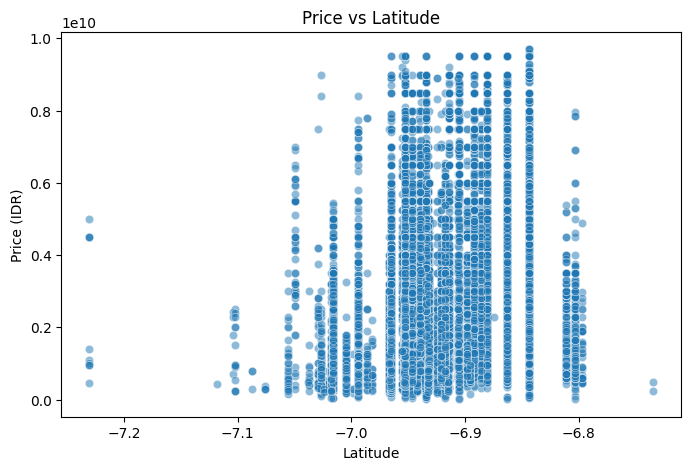

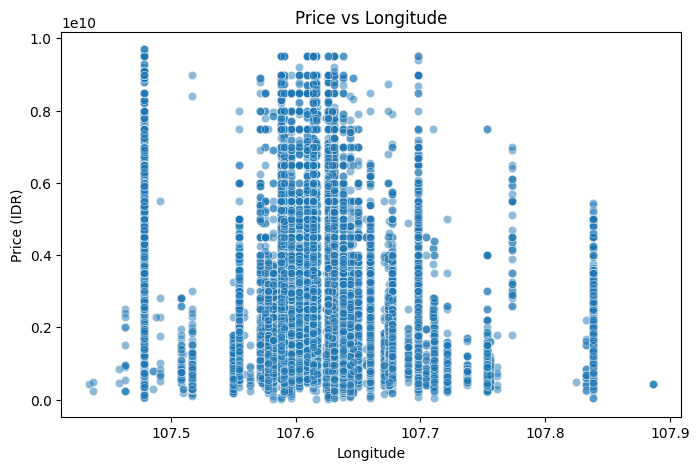

In [337]:
numerical_cols = ['Bedroom', 'Bathroom', 'Carport', 'Land', 'Building','Month','Latitude','Longitude']

for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=col, y='Price', data=df, alpha=0.5)
    plt.title(f'Price vs {col}')
    plt.xlabel(col)
    plt.ylabel('Price (IDR)')
    plt.show()

# **bivariate with categorical**

In [338]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Location', 'City/Regency'], dtype='object')

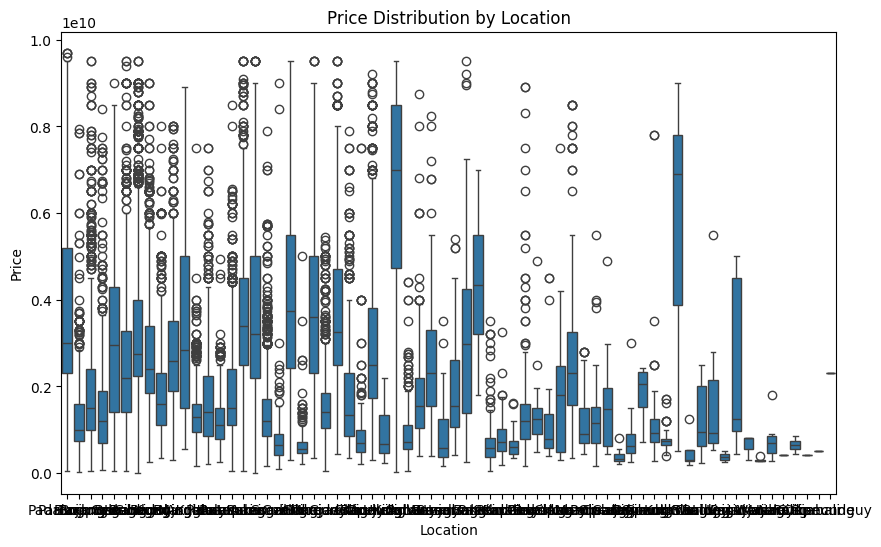

In [339]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Location', y='Price', data=df)
plt.title('Price Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Price')
plt.show()

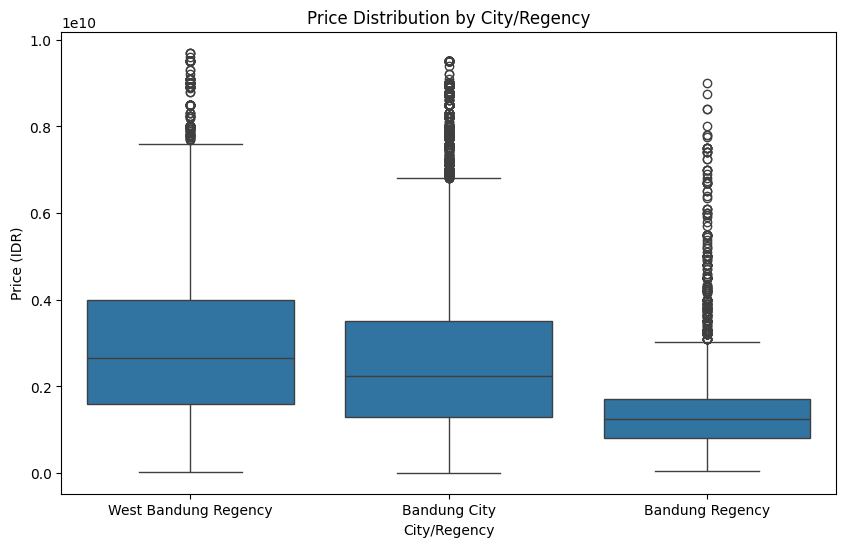

In [340]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='City/Regency', y='Price', data=df)
plt.title('Price Distribution by City/Regency')
plt.xlabel('City/Regency')
plt.ylabel('Price (IDR)')
plt.show()

# **Preprocessing**

## **null value handling**

In [341]:
df.isna().sum()

,0
Price,0
Location,9
Bedroom,0
Bathroom,15
Carport,15
Land,3
Building,9
Month,9
City/Regency,9
Latitude,10


median imputation for skewed features like Land,Building,Carport,Bathroom.
mode imputation for categorical features like City/Regency,Location.
For Month,Latitude,Longitude try forward fill

In [342]:
df['Land'].fillna(df['Land'].median(), inplace=True)
df['Building'].fillna(df['Building'].median(), inplace=True)
df['Carport'].fillna(df['Carport'].median(), inplace=True)
df['Bathroom'].fillna(df['Bathroom'].median(), inplace=True)

<ipython-input-342-7b4ddcb5f248>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Land'].fillna(df['Land'].median(), inplace=True)
<ipython-input-342-7b4ddcb5f248>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [343]:
df['City/Regency'].fillna(df['City/Regency'].mode()[0], inplace=True)
df['Location'].fillna(df['Location'].mode()[0], inplace=True)

<ipython-input-343-eb19bc543f7c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['City/Regency'].fillna(df['City/Regency'].mode()[0], inplace=True)
<ipython-input-343-eb19bc543f7c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

In [344]:
df['Month'].fillna(method='ffill', inplace=True)
df['Latitude'].fillna(method='ffill', inplace=True)
df['Longitude'].fillna(method='ffill', inplace=True)

<ipython-input-344-fb32656dc362>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Month'].fillna(method='ffill', inplace=True)
<ipython-input-344-fb32656dc362>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Month'].fillna(method='ffill', inplace=True)
<ipython-input-344-fb32656dc362>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior wi

In [345]:
df.isna().sum()

,0
Price,0
Location,0
Bedroom,0
Bathroom,0
Carport,0
Land,0
Building,0
Month,0
City/Regency,0
Latitude,0


## **Outliers**

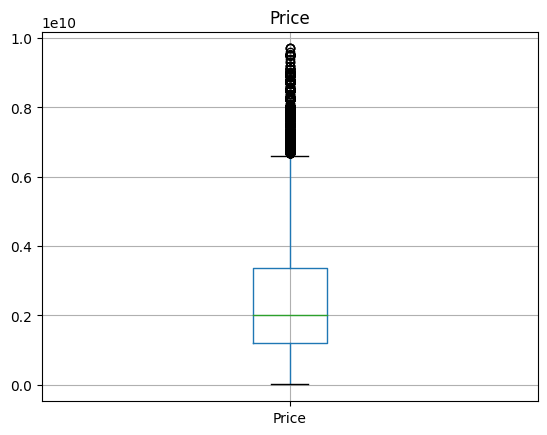

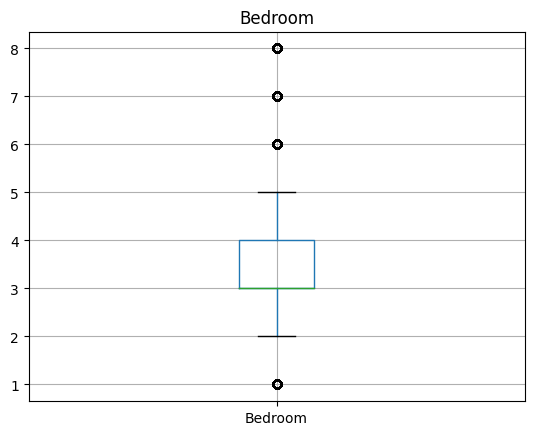

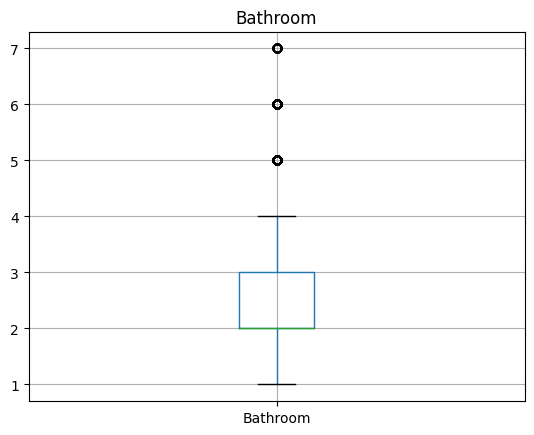

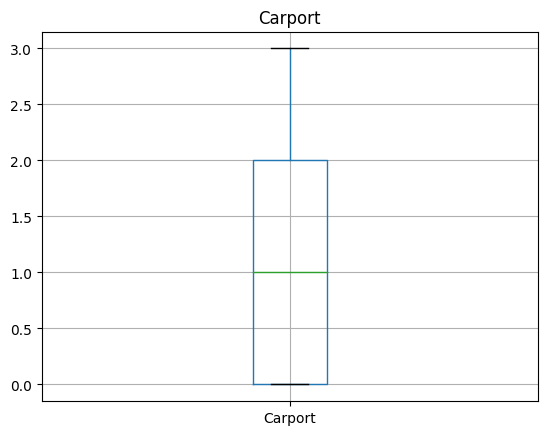

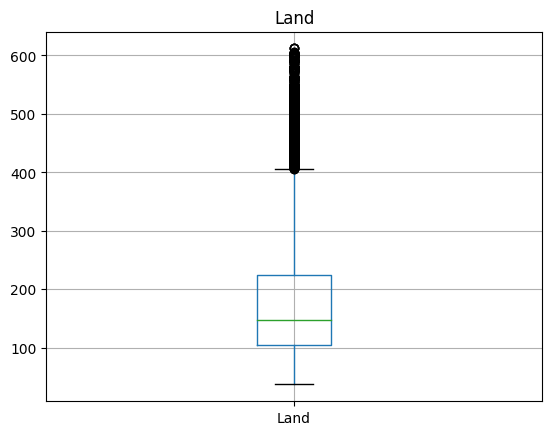

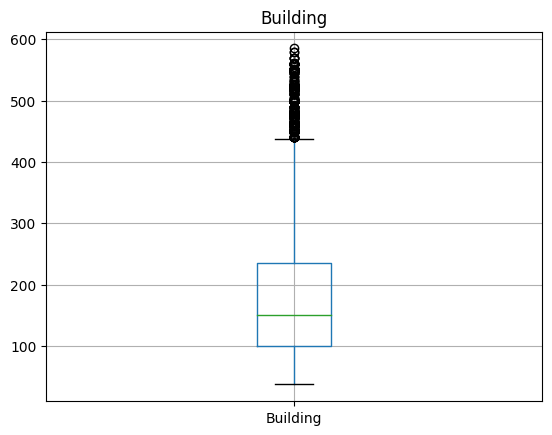

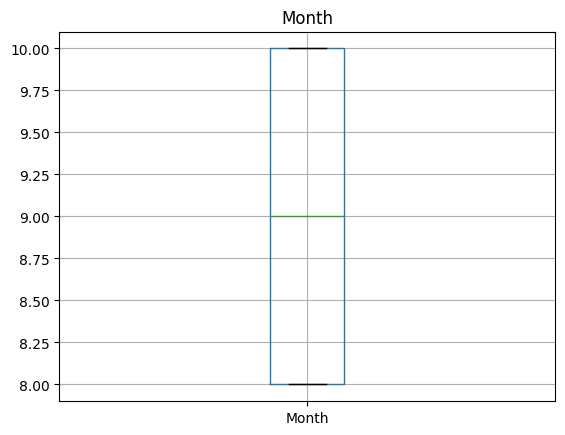

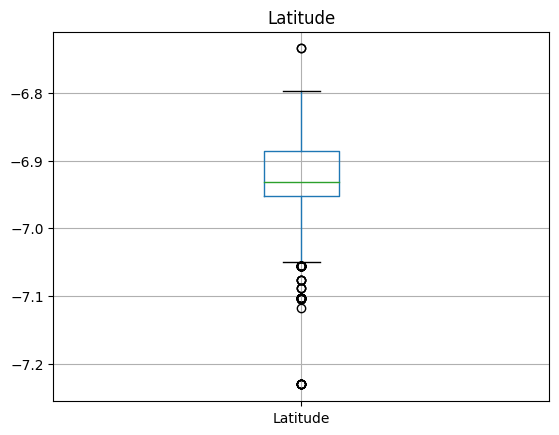

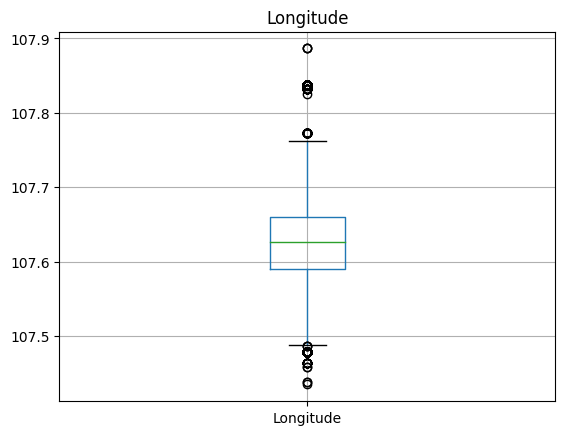

In [346]:
for col in df.columns:
  if df[col].dtype != 'object':
    plt.figure()
    df.boxplot([col])
    plt.title(col)

In [347]:
#IQR

for col in df.columns:
  if df[col].dtype !='object':
    q1=df[col].quantile(0.25)
    q2=df[col].quantile(0.75)

   # find iqr
    iqr=q2-q1

   ##upper bound and lower
    upper=q2+1.5*iqr
    lower=q1-1.5*iqr
    df[col]=np.where(df[col]>upper,upper,df[col])
    df[col]=np.where(df[col]<lower,lower,df[col])



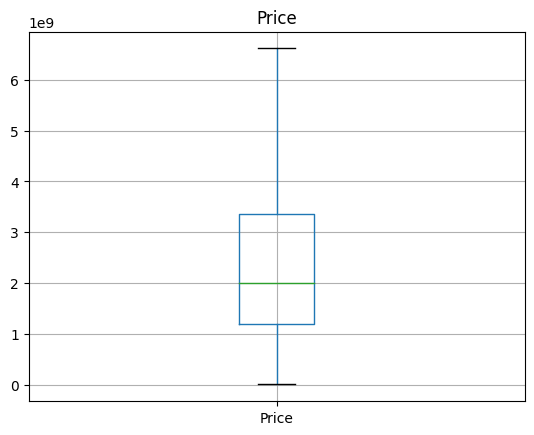

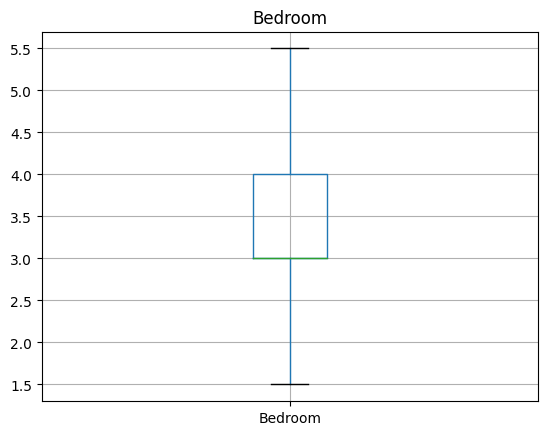

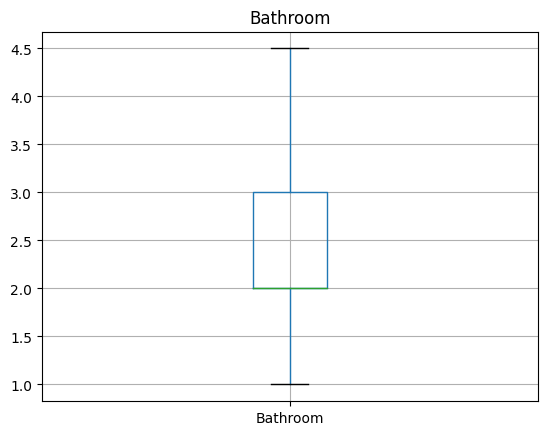

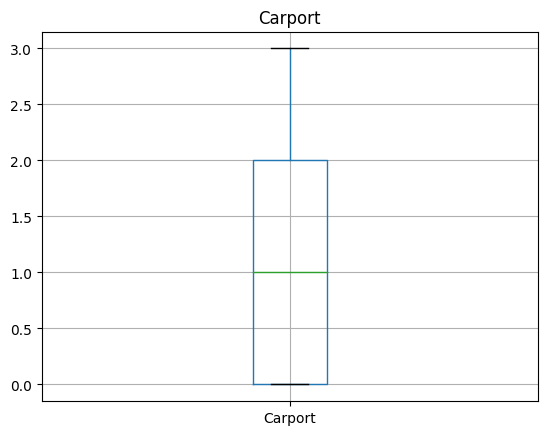

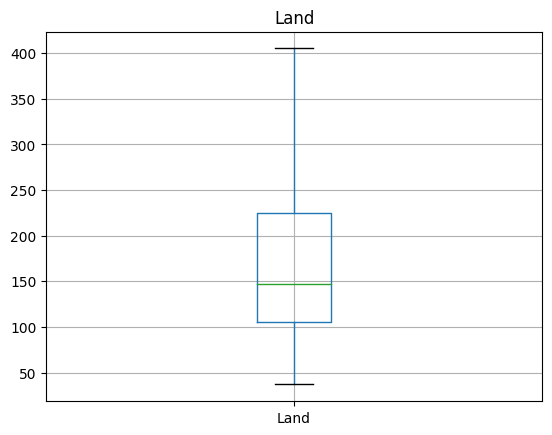

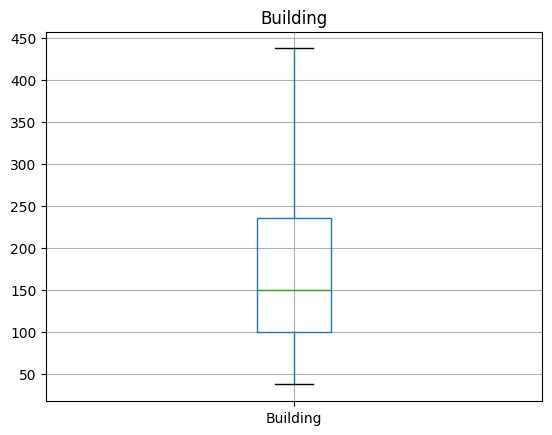

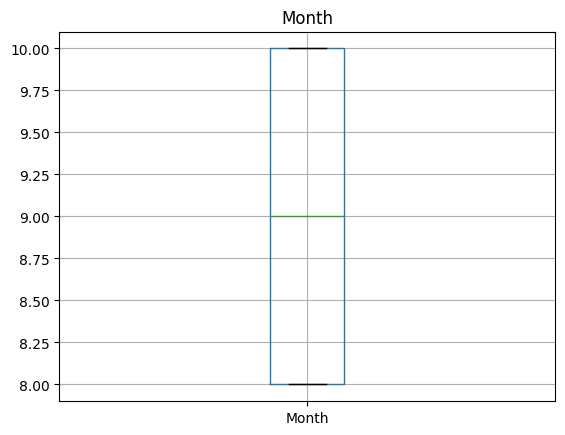

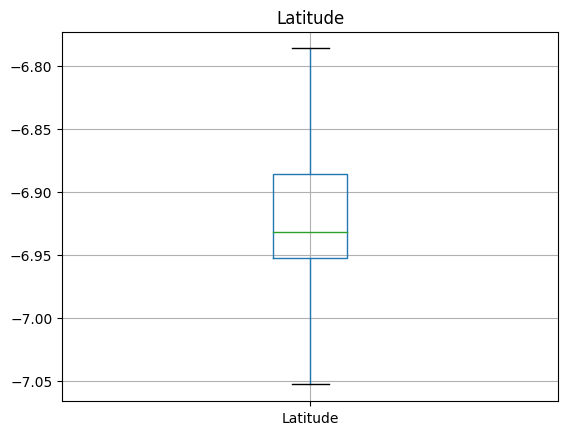

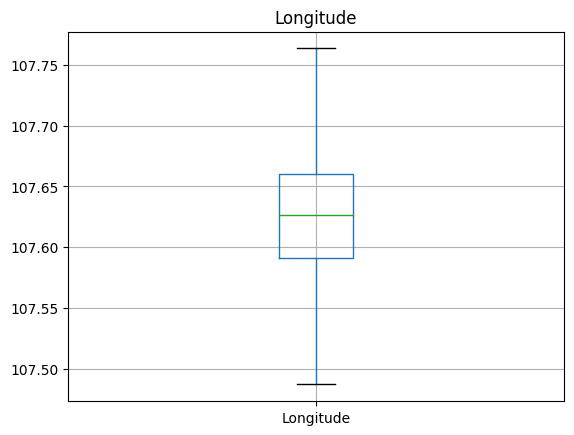

In [348]:
for col in df.columns:
  if df[col].dtype != 'object':
    plt.figure()
    df.boxplot([col])
    plt.title(col)

## **Scaling**

<ipython-input-349-8f307061f8a6>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


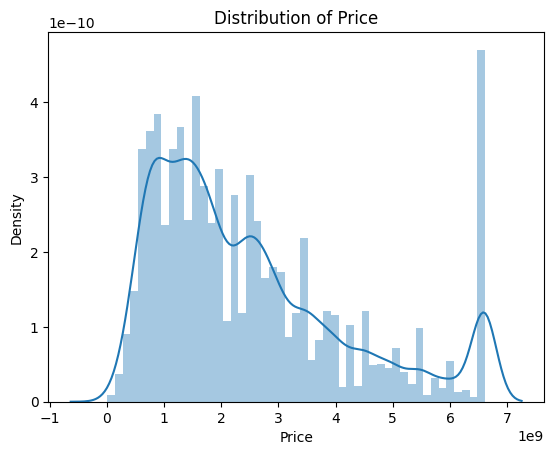

<ipython-input-349-8f307061f8a6>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


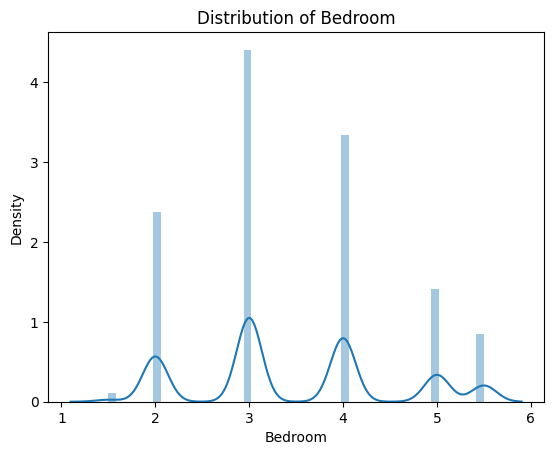

<ipython-input-349-8f307061f8a6>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


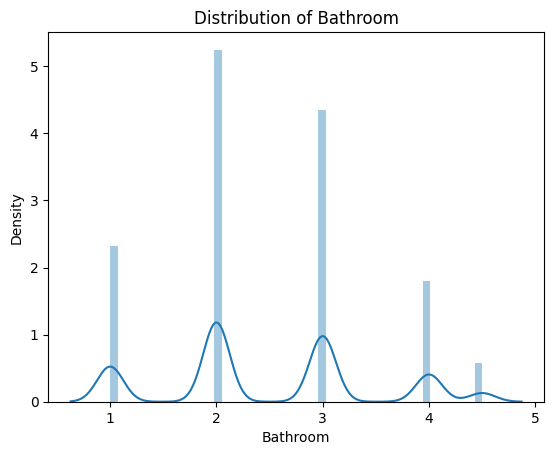

<ipython-input-349-8f307061f8a6>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


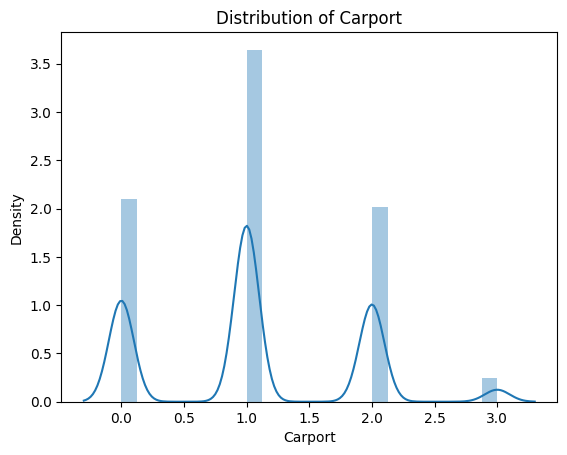

<ipython-input-349-8f307061f8a6>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


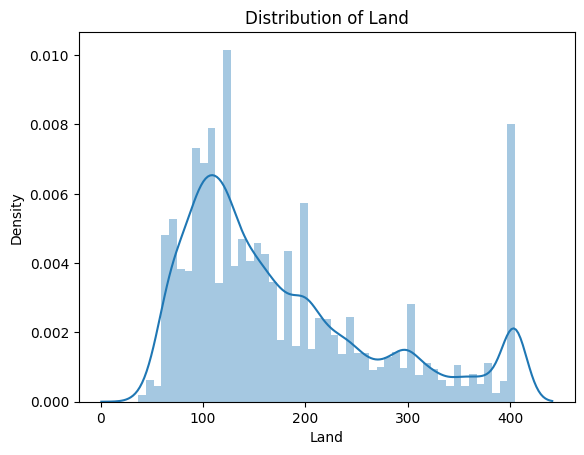

<ipython-input-349-8f307061f8a6>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


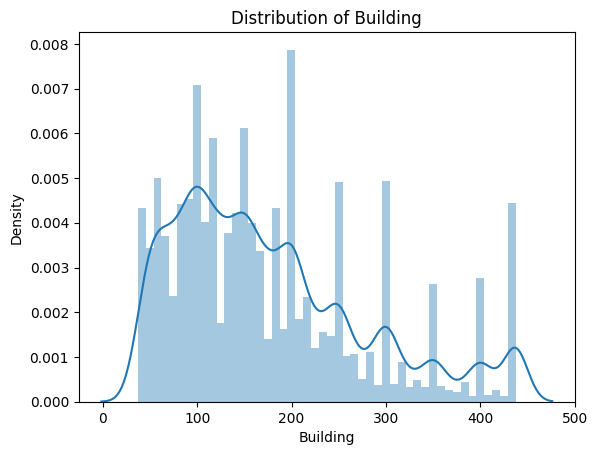

<ipython-input-349-8f307061f8a6>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


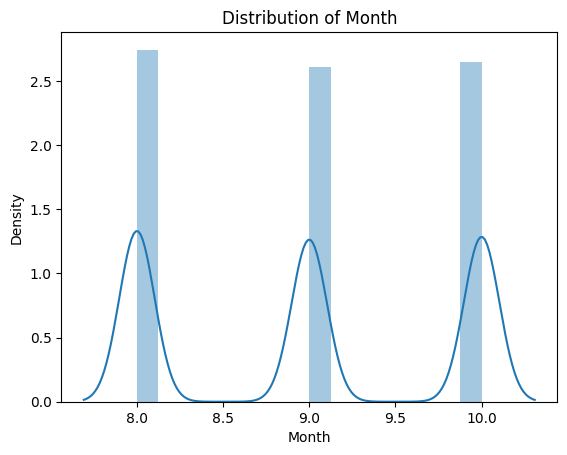

<ipython-input-349-8f307061f8a6>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


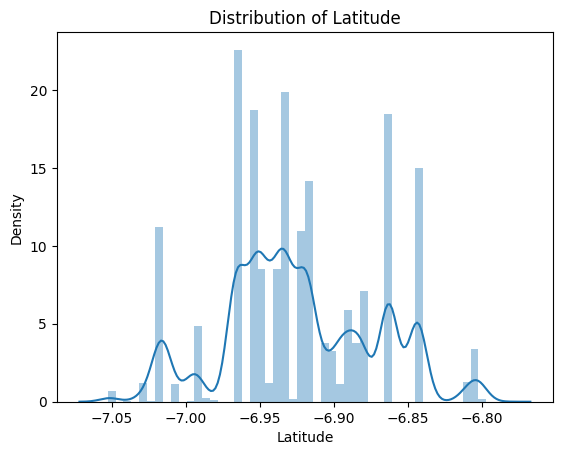

<ipython-input-349-8f307061f8a6>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


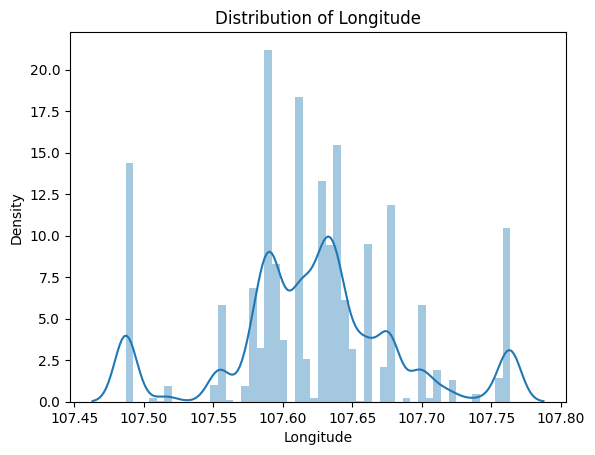

In [349]:
for col in df.columns:
  if df[col].dtype != 'object':
    plt.figure()
    sns.distplot(df[col])
    plt.title(f'Distribution of {col}')
    plt.show()

In [350]:
df.head()

,Price,Location,Bedroom,Bathroom,Carport,Land,Building,Month,City/Regency,Latitude,Longitude
0,1.600000e+09,Padalarang,2.0,1.0,1.0,72.0,50.0,8.0,West Bandung Regency,-6.843600,107.487046
1,8.500000e+08,Parongpong,2.0,1.0,1.0,70.0,80.0,8.0,West Bandung Regency,-6.803228,107.581804
2,8.750000e+08,Buah Batu,3.0,2.0,1.0,60.0,70.0,8.0,Bandung City,-6.965549,107.637926
3,1.750000e+09,Bojongsoang,2.0,3.0,1.0,90.0,94.0,8.0,Bandung Regency,-6.993945,107.643700
4,4.900000e+09,Bojongloa Kidul,4.0,4.0,0.0,200.0,300.0,8.0,Bandung City,-6.947036,107.596271


In [351]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['Price', 'Land', 'Building', 'Bedroom', 'Bathroom', 'Carport']

df_log_transformed = df.copy()
for feature in numerical_features:
    df_log_transformed[feature] = np.log1p(df_log_transformed[feature])

In [352]:
scaler = StandardScaler()

data_log_standardized = df_log_transformed.copy()
data_log_standardized[numerical_features] = scaler.fit_transform(df_log_transformed[numerical_features])
data_log_standardized.head()


,Price,Location,Bedroom,Bathroom,Carport,Land,Building,Month,City/Regency,Latitude,Longitude
0,-0.269350,Padalarang,-1.511020,-1.744573,0.136786,-1.450505,-1.799090,8.0,West Bandung Regency,-6.843600,107.487046
1,-1.130596,Parongpong,-1.511020,-1.744573,0.136786,-1.503761,-1.029478,8.0,West Bandung Regency,-6.803228,107.581804
2,-1.091127,Buah Batu,-0.328646,-0.372981,0.136786,-1.794786,-1.248687,8.0,Bandung City,-6.965549,107.637926
3,-0.147333,Bojongsoang,-1.511020,0.600180,0.136786,-1.027979,-0.764256,8.0,Bandung Regency,-6.993945,107.643700
4,1.254603,Bojongloa Kidul,0.588474,1.355022,-1.502937,0.491205,1.154242,8.0,Bandung City,-6.947036,107.596271


since the dataset contains skewness ,used log transformation and standard scaled

## **encoding**

In [353]:
df2=data_log_standardized.copy()

In [354]:

df2.head()

,Price,Location,Bedroom,Bathroom,Carport,Land,Building,Month,City/Regency,Latitude,Longitude
0,-0.269350,Padalarang,-1.511020,-1.744573,0.136786,-1.450505,-1.799090,8.0,West Bandung Regency,-6.843600,107.487046
1,-1.130596,Parongpong,-1.511020,-1.744573,0.136786,-1.503761,-1.029478,8.0,West Bandung Regency,-6.803228,107.581804
2,-1.091127,Buah Batu,-0.328646,-0.372981,0.136786,-1.794786,-1.248687,8.0,Bandung City,-6.965549,107.637926
3,-0.147333,Bojongsoang,-1.511020,0.600180,0.136786,-1.027979,-0.764256,8.0,Bandung Regency,-6.993945,107.643700
4,1.254603,Bojongloa Kidul,0.588474,1.355022,-1.502937,0.491205,1.154242,8.0,Bandung City,-6.947036,107.596271


In [355]:
fe_location = df2.groupby('Location').size()/len(df2)
df2['Location_freq_encode'] = df2['Location'].map(fe_location)

fe_city = df2.groupby('City/Regency').size()/len(df2)
df2['City_freq_encode'] = df2['City/Regency'].map(fe_city)

df2.head()

,Price,Location,Bedroom,Bathroom,Carport,Land,Building,Month,City/Regency,Latitude,Longitude,Location_freq_encode,City_freq_encode
0,-0.269350,Padalarang,-1.511020,-1.744573,0.136786,-1.450505,-1.799090,8.0,West Bandung Regency,-6.843600,107.487046,0.078682,0.105975
1,-1.130596,Parongpong,-1.511020,-1.744573,0.136786,-1.503761,-1.029478,8.0,West Bandung Regency,-6.803228,107.581804,0.018042,0.105975
2,-1.091127,Buah Batu,-0.328646,-0.372981,0.136786,-1.794786,-1.248687,8.0,Bandung City,-6.965549,107.637926,0.085751,0.737890
3,-0.147333,Bojongsoang,-1.511020,0.600180,0.136786,-1.027979,-0.764256,8.0,Bandung Regency,-6.993945,107.643700,0.025879,0.156135
4,1.254603,Bojongloa Kidul,0.588474,1.355022,-1.502937,0.491205,1.154242,8.0,Bandung City,-6.947036,107.596271,0.045211,0.737890


In [356]:
df2.shape

(32536, 13)

In [357]:
columns_to_remove = ['City/Regency','Location']
df2= df2.drop(columns=columns_to_remove)

In [358]:
df2.head()

,Price,Bedroom,Bathroom,Carport,Land,Building,Month,Latitude,Longitude,Location_freq_encode,City_freq_encode
0,-0.269350,-1.511020,-1.744573,0.136786,-1.450505,-1.799090,8.0,-6.843600,107.487046,0.078682,0.105975
1,-1.130596,-1.511020,-1.744573,0.136786,-1.503761,-1.029478,8.0,-6.803228,107.581804,0.018042,0.105975
2,-1.091127,-0.328646,-0.372981,0.136786,-1.794786,-1.248687,8.0,-6.965549,107.637926,0.085751,0.737890
3,-0.147333,-1.511020,0.600180,0.136786,-1.027979,-0.764256,8.0,-6.993945,107.643700,0.025879,0.156135
4,1.254603,0.588474,1.355022,-1.502937,0.491205,1.154242,8.0,-6.947036,107.596271,0.045211,0.737890


In [359]:
df2.shape

(32536, 11)

Used frequency encoding because of high cardinality

## **fetaure selection**

In [360]:
df3=df2.copy()

In [367]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

X = df3.drop('Price', axis=1)
y = df3['Price']

model = LinearRegression()

rfe = RFE(estimator=model, n_features_to_select=7)

rfe = rfe.fit(X, y)


In [368]:
selected_features = X.columns[rfe.support_]

print("Selected Features:", selected_features)
X_selected = X[selected_features]

Selected Features: Index(['Bathroom', 'Land', 'Building', 'Latitude', 'Longitude',
       'Location_freq_encode', 'City_freq_encode'],
      dtype='object')


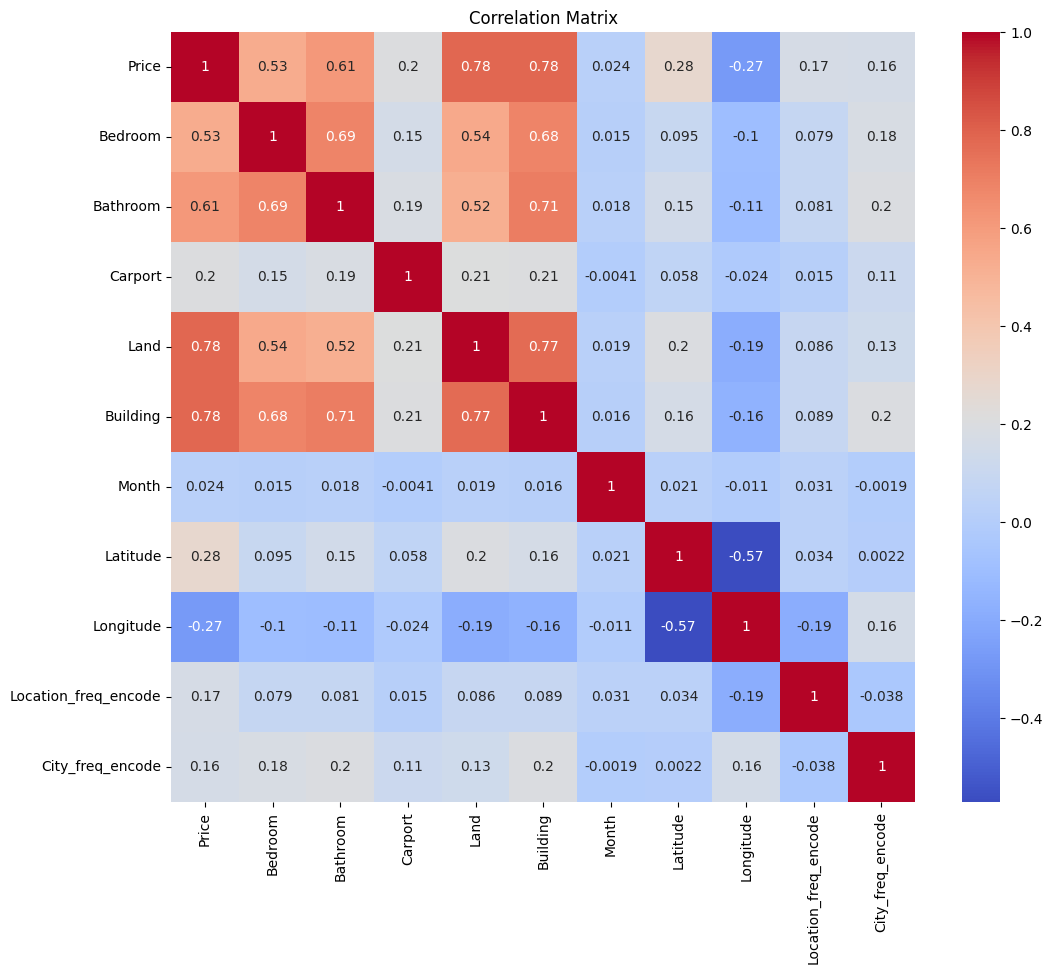

In [366]:
correlation_matrix = df3.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Land and Building,Bathroom and Bedroom,Latitude and Longitude

# **Model selection**

**Random Forest**

In [369]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,root_mean_squared_error
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42,)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor()  # You can adjust the number of estimators

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Root Mean Squared Error: {rmse}")


Mean Squared Error: 0.12828770052734295
R-squared: 0.8689832055827342
Root Mean Squared Error: 0.35817272443242093


**XGboost**

In [370]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror')

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")



Mean Squared Error: 0.15641807049790152
R-squared: 0.840254411753206


**SVM**

In [372]:
from sklearn.svm import SVR

# Train an SVR model (with RBF kernel by default)
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Root Mean Squared Error: {rmse}")


Mean Squared Error: 0.2949663552422129
R-squared: 0.6987587573405578
Root Mean Squared Error: 0.5431080511668124


**Decision Tree**

In [373]:
from sklearn.tree import DecisionTreeRegressor

# Train a Decision Tree Regressor
tree = DecisionTreeRegressor(max_depth=5, random_state=42)  # You can tune max_depth
tree.fit(X_train, y_train)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Root Mean Squared Error: {rmse}")


Mean Squared Error: 0.2949663552422129
R-squared: 0.6987587573405578
Root Mean Squared Error: 0.5431080511668124


came to the conclusion that **random forest regressor** gave the best Rsquared value ,so it is the best model

Key Drivers of Price: used both RFE and correlation heatmap to find the best features so came to conclution of using features selected by which are 'Bathroom', 'Land', 'Building', 'Latitude', 'Longitude',
       'Location_freq_encode', 'City_freq_encode



**Property Recommendations**:one should consider these fetures Bathroom', 'Land', 'Building', 'Latitude', 'Longitude', 'Location_freq_encode', 'City_freq_encode
while purcahsing the property



**Location Analysis:**

In [379]:

price_by_location = df.groupby('City/Regency')['Price'].mean().reset_index()

land_building_by_location = df.groupby('City/Regency')[['Land', 'Building']].mean().reset_index()
location_analysis = pd.merge(price_by_location, land_building_by_location, on='City/Regency')

location_analysis.columns = ['City/Regency', 'Average Price', 'Average Land Area', 'Average Building Area']

location_analysis


,City/Regency,Average Price,Average Land Area,Average Building Area
0,Bandung City,2.638957e+09,184.897951,188.798130
1,Bandung Regency,1.419514e+09,134.107677,129.882677
2,West Bandung Regency,3.047079e+09,189.195766,168.056990


In [380]:
location_analysis.describe()

,Average Price,Average Land Area,Average Building Area
count,3.000000e+00,3.000000,3.000000
mean,2.368517e+09,169.400465,162.245932
std,8.468146e+08,30.639899,29.884510
min,1.419514e+09,134.107677,129.882677
25%,2.029236e+09,159.502814,148.969833
50%,2.638957e+09,184.897951,168.056990
75%,2.843018e+09,187.046858,178.427560
max,3.047079e+09,189.195766,188.798130


Larger land areas in West Bandung Regency.

Urban development factors affecting property value.

Possible differences in location desirability, infrastructure, and demand.

